#### Multicollinearity

Examples of Multiconilearity:
Multicollinearity occurs when more than two explicative variables in a regression are highly correlated. For example, lets say
we want to use a Mincer regression where our explicative variables include parents income, mother income and household expenses. This variables could be highly assosiated by theory. In an extreme case Perfect Multicollinearity exists
if we include  the previous variables in dollar and also in soles. Gauss-Markov does not allow us the use of perfect multicollinearity, but the approximate multicollinearity.

Correlation between variables could be understood if varable $w$ is an unexact linear combination of $x$ and $z$.

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 z_i +\beta_3 w_i+ u$$ 

Where $z$ is a constant fraction  $\alpha$  of $x$ and $\gamma$ of $z$ plus an small perturbation k with normal distribution:

$w_i = \alpha x_i + \gamma z_i +k_i$

In an Perfect Multicollinearity $k_i = 0$

In [138]:
install.packages("matlib")
library(matlib)

Installing package into 'C:/Users/Alvaro/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'broom', 'numDeriv', 'SparseM', 'MatrixModels', 'sp', 'minqa', 'nloptr', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'lme4', 'rgl', 'car'




package 'broom' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked
package 'matlib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in


In [135]:
m1 <- matrix(rnorm(100),ncol = 10)
m1

1.49123792,0.5357463,1.9439276,-0.1108895,0.1258937,-1.1499998,0.8098416,0.1914131,0.03841877,0.71735176
0.09305892,-1.6394712,-0.8558766,0.3441271,0.9624762,1.0128684,0.2866929,-0.1275378,-1.02846044,0.48701026
1.31941823,-0.4017613,-0.4376664,0.7620216,0.3539843,0.7164309,1.1107876,0.2180863,-0.30759920,-0.75974340
0.80776807,-2.9881179,0.2000656,0.5776012,0.7640841,-1.3814131,-1.4104438,-0.5376659,-1.46114209,-0.12998305
-0.83197262,-0.7060435,-0.7097906,-1.1759396,0.2873359,-0.9514671,-0.9400092,-0.6480740,0.47237764,2.47708113
0.41912231,-0.3965382,-0.2537047,0.4269552,0.9435271,1.5311009,1.0422785,-1.0632457,-0.30763050,-0.04226820
-1.67843193,-0.7402312,-0.2459532,0.8588583,-0.8449783,1.0036265,0.2960752,-0.2732862,0.36763320,-0.62819258
-0.36843116,-1.1950944,1.1063047,-0.8583093,-0.6813054,-1.6219627,-0.4578195,-0.2483516,-0.79090646,-0.89997365
-0.13708315,0.7823470,-0.3853133,0.1078342,-0.2555302,-0.4795169,1.0325691,0.3652039,-0.85861223,0.51945066
-1.72753502,0.5400894,0.4330546,-0.2618290,-0.7914397,-1.1832765,-0.2323090,-1.0853083,0.62877417,-0.05724815


In [136]:
#set last column is as a linear combination of last 3 columns
m1[,10] = m1[,7] * 2 + m1[,8] * 3 + m1[,9] * 4
m1

1.49123792,0.5357463,1.9439276,-0.1108895,0.1258937,-1.1499998,0.8098416,0.1914131,0.03841877,2.347597
0.09305892,-1.6394712,-0.8558766,0.3441271,0.9624762,1.0128684,0.2866929,-0.1275378,-1.02846044,-3.923069
1.31941823,-0.4017613,-0.4376664,0.7620216,0.3539843,0.7164309,1.1107876,0.2180863,-0.30759920,1.645437
0.80776807,-2.9881179,0.2000656,0.5776012,0.7640841,-1.3814131,-1.4104438,-0.5376659,-1.46114209,-10.278454
-0.83197262,-0.7060435,-0.7097906,-1.1759396,0.2873359,-0.9514671,-0.9400092,-0.6480740,0.47237764,-1.934730
0.41912231,-0.3965382,-0.2537047,0.4269552,0.9435271,1.5311009,1.0422785,-1.0632457,-0.30763050,-2.335702
-1.67843193,-0.7402312,-0.2459532,0.8588583,-0.8449783,1.0036265,0.2960752,-0.2732862,0.36763320,1.242825
-0.36843116,-1.1950944,1.1063047,-0.8583093,-0.6813054,-1.6219627,-0.4578195,-0.2483516,-0.79090646,-4.824320
-0.13708315,0.7823470,-0.3853133,0.1078342,-0.2555302,-0.4795169,1.0325691,0.3652039,-0.85861223,-0.273699
-1.72753502,0.5400894,0.4330546,-0.2618290,-0.7914397,-1.1832765,-0.2323090,-1.0853083,0.62877417,-1.205446


In [143]:
det(m1)
# it has a determinant different from zero (but very small number) so it must have a inverse matrix in theory.

[1] -1.197492e-13

In [142]:
solve(m1)

ERROR: Error in solve.default(m1): sistema es computacionalmente singular: número de condición recíproco = 4.03749e-18


In [140]:
inv(m1)
#R can´t find the inverse

ERROR: Error in Inverse(X, tol = sqrt(.Machine$double.eps), ...): X is numerically singular


In [148]:
# increasing the tolerance in R to be able to find the inverse
inv_m1=solve(m1,tol = 4.03749e-18)
inv_m1

-4.186522e-01,-1.040305e+00,2.345079e-01,1.058257e-02,1.336416e-01,2.184238e-01,-3.437462e-02,2.391791e-01,3.141126e-01,2.534750e-01
-1.552787e-01,1.120336e-01,-4.606038e-01,3.836494e-02,-2.441637e-01,1.685804e-01,-2.346826e-01,-2.322404e-01,1.059189e-01,1.503250e-01
5.165689e-01,5.450016e-01,-6.598757e-01,7.514159e-02,-1.151973e-01,3.451840e-02,2.736203e-01,-8.069882e-03,-3.893872e-01,-6.643004e-01
-5.404306e-02,6.966920e-01,4.798065e-01,1.304436e-01,-7.509290e-01,-5.442589e-01,-3.637873e-01,-4.240505e-01,-3.662634e-01,9.312465e-01
7.321104e-01,2.173330e+00,-2.660269e-01,1.150046e-02,-7.551113e-02,-4.135733e-01,-3.840640e-01,-7.206099e-01,-9.816447e-01,-1.840074e-01
-1.180591e-01,-4.722366e-01,-5.902957e-01,5.902957e-02,0.000000e+00,5.902957e-01,3.541774e-01,1.770887e-01,0.000000e+00,-9.444732e-01
-3.539535e+14,1.650570e+15,1.004348e+15,-5.714898e+14,-9.653477e+14,-9.951867e+14,-1.125900e+15,2.802811e+14,-1.102557e+15,1.628307e+15
-5.309303e+14,2.475854e+15,1.506522e+15,-8.572346e+14,-1.448022e+15,-1.492780e+15,-1.688850e+15,4.204217e+14,-1.653835e+15,2.442460e+15
-7.079071e+14,3.301139e+15,2.008696e+15,-1.142980e+15,-1.930695e+15,-1.990373e+15,-2.251800e+15,5.605622e+14,-2.205114e+15,3.256614e+15
1.769768e+14,-8.252848e+14,-5.021740e+14,2.857449e+14,4.826738e+14,4.975933e+14,5.629500e+14,-1.401406e+14,5.512785e+14,-8.141534e+14


In coclusion, in order to get the inverse of m1 we need to increase the tolerance of R to consider longer decimal numbers.
this isn´t needed in Python since it can detect those numbers by default. 

 #### Analyzing RCT data with Precision Adjustment

In [5]:
## loading the data
Penn <- as.data.frame(read.table("penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

In [6]:
T2<- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [7]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


In [8]:
#summarize variables 
summary(Penn)

      abdt             tg            inuidur1        inuidur2    
 Min.   :10404   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.:10600   1st Qu.:0.0000   1st Qu.: 3.00   1st Qu.: 2.00  
 Median :10698   Median :0.0000   Median :11.00   Median :10.00  
 Mean   :10696   Mean   :0.8398   Mean   :13.03   Mean   :12.25  
 3rd Qu.:10796   3rd Qu.:2.0000   3rd Qu.:25.00   3rd Qu.:23.00  
 Max.   :10880   Max.   :2.0000   Max.   :52.00   Max.   :52.00  
     female           black           hispanic          othrace        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.000000  
 Mean   :0.4007   Mean   :0.1188   Mean   :0.03632   Mean   :0.005189  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000000  
      dep               q1        

#### Balance check

In [10]:
#install.packages("lmtest")
#install.packages("sandwich")

library(lmtest)
library(sandwich)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [11]:
#regression of treatment tg == T2
# ^2 to include the interactions

m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [12]:
# m as dataframe
X <- as.data.frame( model.matrix(m) )

In [13]:
head(X)

,(Intercept),female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0


### Model specifications
##### 1.1 No adjustment

In [14]:
# no adjustment (2-sample approach)

formula_cl <- log(inuidur1)~T2

ols.cl_reg <- lm(formula_cl)

ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))

print(ols.cl)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



##### 1.2 adding control

In [15]:
# adding controls
# Omitted dummies: q1, nondurable, muld

formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2

ols.cra_reg <- lm(formula_cra)

ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))

print(ols.cra)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5                   -0.1777168  0.3598757 -0.4938 0.6214465    
q6                   -0.4456044  0.3612792 -1.2334 0.2174749    
agelt35              -0.3264815  0.3108711 -1.0502 0.2936639    
agegt54              -0.1551504  0.4796700 -0.3235 0.7463646    

In [16]:
X <- as.data.frame( model.matrix(ols.cra_reg) )

In [17]:
# get same dataframe for ols.cl

X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

#Change name
names(X1)[2] <- "T2"

###### 1.3 Interactive model

In [18]:
# interactive regression model variables #without intercept [,-1]

X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1]
dim(X)

[1] 5782  119

In [19]:
#interactive regression model
#first we get the mean of all variables

demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)

# we get the coef of T2 with the variables and T2 with the interaction of those variables.


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [20]:
head(X)

,female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,q6,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
1,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
2,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,-0.06520235,...,0,-0.07350398,0.8675199,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
3,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
4,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
5,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
6,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,0.98114839,0.9674853,-0.02767209,0.94500173,-0.02905569,0


In [96]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]
no_col

[1] "Xblack:othrace"          "Xblack:q6"              
 [3] "Xothrace:q6"             "Xq2:q3"                 
 [5] "Xq2:q4"                  "Xq2:q5"                 
 [7] "Xq2:q6"                  "Xq3:q4"                 
 [9] "Xq3:q5"                  "Xq3:q6"                 
[11] "Xq4:q5"                  "Xq4:q6"                 
[13] "Xq5:q6"                  "Xq6:lusd"               
[15] "Xq6:husd"                "Xagelt35:agegt54"       
[17] "Xlusd:husd"              "T2TRUE:Xblack:othrace"  
[19] "T2TRUE:Xblack:q6"        "T2TRUE:Xothrace:q2"     
[21] "T2TRUE:Xothrace:q6"      "T2TRUE:Xothrace:agegt54"
[23] "T2TRUE:Xothrace:husd"    "T2TRUE:Xq2:q3"          
[25] "T2TRUE:Xq2:q4"           "T2TRUE:Xq2:q5"          
[27] "T2TRUE:Xq2:q6"           "T2TRUE:Xq3:q4"          
[29] "T2TRUE:Xq3:q5"           "T2TRUE:Xq3:q6"          
[31] "T2TRUE:Xq4:q5"           "T2TRUE:Xq4:q6"          
[33] "T2TRUE:Xq5:q6"           "T2TRUE:Xq6:lusd"        
[35] "T2TRUE:Xq6:husd"         "T2TRUE:Xagelt35:agegt54"
[37] "T2TRUE:Xlusd:husd"

### Partialling-out

In [21]:
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
1,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
2,0.5800761,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,...,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
3,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
4,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
5,0.5800761,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
6,-0.4199239,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


In [22]:
# import libary for lasso

library(hdm)

# we indicate where the treatment varible is with index = 1

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

# rlassoEffects ( Partialling out )
# index = 1 (T4 treatment )

print(rlasso.ira)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [23]:
#install.packages("xtable")

library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

Installing package into 'C:/Users/Alvaro/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alvaro\AppData\Local\Temp\RtmpmGxeJN\downloaded_packages


,CL,CRA,IRA,IRA w Lasso
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 4.1.3 by xtable 1.8-4 package
% Fri Apr 29 11:22:39 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


Treatment group 2 (T2) experiences aprox. 7.2% less weeks unemployed.
All methods have similar standard errors. 


### Plots

In [90]:
#install.packages("coefplot")
#install.packages("ggplot2")
library(ggplot2)
library(coefplot)

Density

In [34]:
treatment <- subset(Penn,tg==2)
control<- subset(Penn,tg==0)

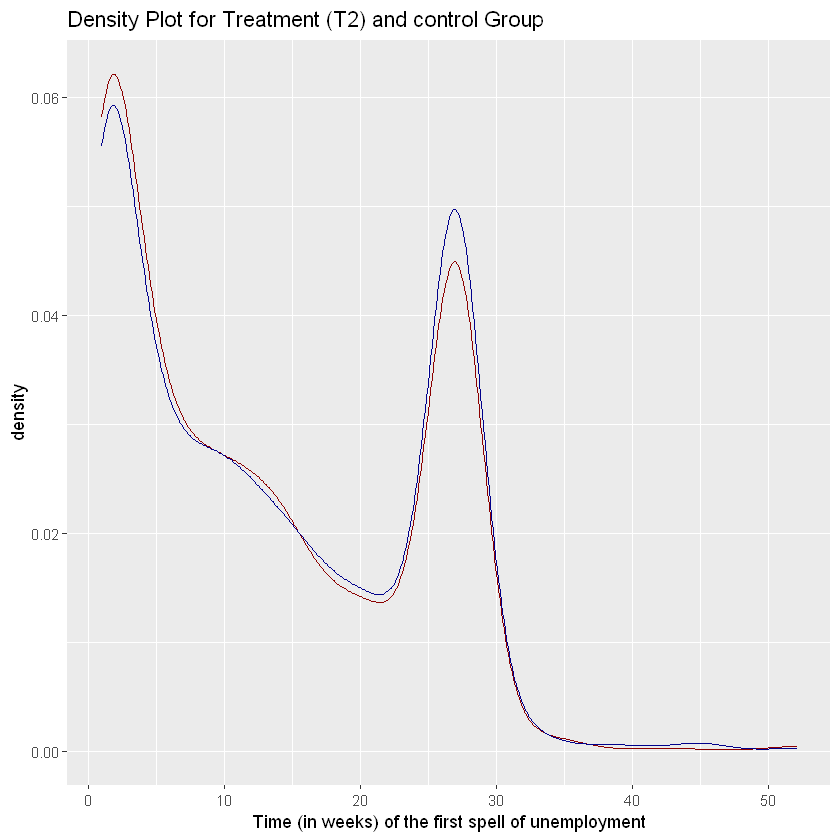

In [125]:
density <-   ggplot() + 
                        geom_density(data =  treatment, aes(x = inuidur1), color = "darkred") +
                        geom_density(data = control, aes(x = inuidur1), color = "darkblue") +
                        ggtitle ('Density Plot for Treatment (T2) and control Group') +  
                        labs(x= 'Time (in weeks) of the first spell of unemployment', color = "Legend")

            
density

Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



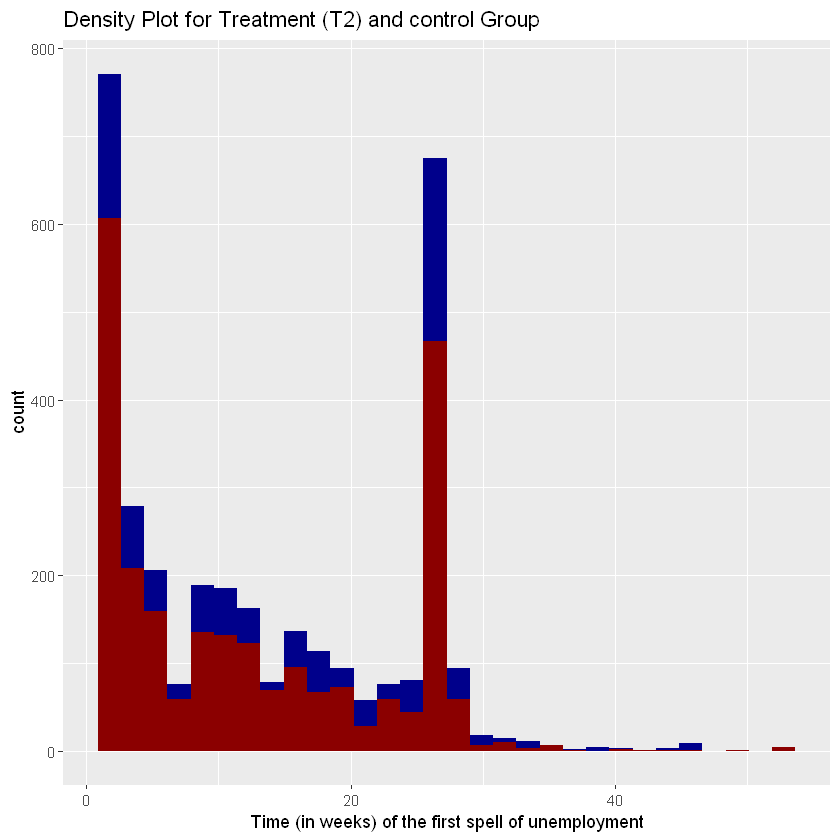

In [124]:
histogram <- ggplot() +
                        geom_histogram(data =  control, aes( x = inuidur1),fill = "darkblue") +
                        geom_histogram(data = treatment, aes( x = inuidur1), fill = "darkred") +
                        ggtitle ('Density Plot for Treatment (T2) and control Group') +  
                        labs(x= 'Time (in weeks) of the first spell of unemployment', color = "Legend")
histogram

Coefficients plot

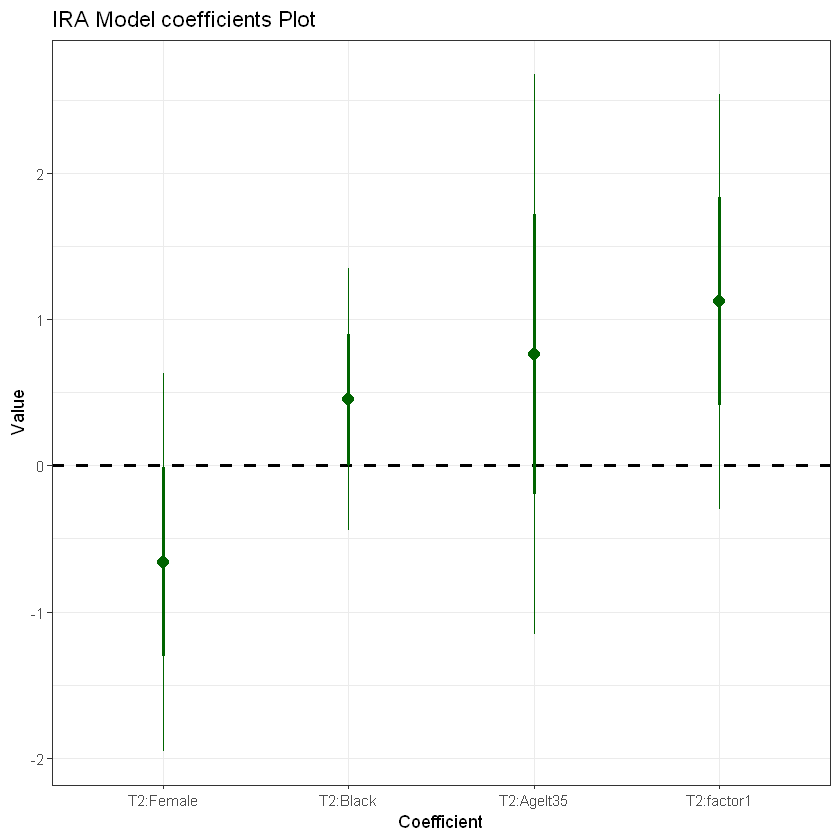

In [123]:
coefplot(ols.ira_reg, coefficients = c('T2:Xfemale' ,'T2:Xblack','T2:Xagelt35','T2:Xfactor(dep)1'),
         title = "IRA Model coefficients Plot",
         color = 'darkgreen',
         horizontal=TRUE,
         zeroColor = 'black')  +
         theme_bw() + scale_y_discrete(labels=c("T2:Female", "T2:Black", "T2:Agelt35", "T2:factor1"))